# 1. Exploratory Data Analysis

In [ ]:
#adv.csv를 읽어보세요~
import pandas as pd
adv = pd.read_csv("adv.csv", index_col=0)
#adv.info()
adv.describe().T#describe 적용
#adv.TV.hist(bins=10) #분포
#adv.plot.scatter(x='TV', y='sales')  #산점도
adv.corr()   #상관관계, correlation, 직선 관계,, ->  -1 ~  1
#1: 완전 우상향
#0: 관계없음
#-1: 완전 우하향

In [ ]:
import seaborn as sns
sns.pairplot(adv)
sns.jointplot( x='TV', y='sales', data=adv)
sns.heatmap( adv.corr() )

In [ ]:
#diamonds.csv 를 읽으셔서 수치형변수들만 선택하셔서, pairplot, jointplot
#corr heatmap
#describe
diamonds = pd.read_csv("diamonds.csv")
dia2 = diamonds.drop( ["cut", "color","clarity"], axis=1)
sns.jointplot( x="carat", y="price", data=dia2)
sns.heatmap( dia2.corr() )   #-1~1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
boston = pd.read_csv("BostonHousing.csv")
boston.columns
#boston.info()
# boston의 컬럼별 평균, 중앙값, 표준편차를 확인,
#행열전환, 평균, 중앙값, 표준편차만 출력
boston.describe().T[["mean", "std", "50%"]]

In [ ]:
boston.hist(bins=30, figsize=(12,12), density=True)

In [ ]:
df1 = stock.get_market_ohlcv_by_date("20240101","20240630", "005930")

In [ ]:
df1.종가.plot()
df1.hist()

In [ ]:
df1.describe()

In [ ]:
df1[ ["종가", "거래량"]].diff().dropna().cov()
df1[ ["종가", "거래량"]].diff().dropna().corr()

,종가,거래량
종가,1.000000,0.195843
거래량,0.195843,1.000000


In [ ]:
#creditset2.csv credit
# 1. income, loan  cov, corr
# 2. credit minmax scaling, cov, corr

credit2 = credit[  ["income", "loan"]]
print( credit2.cov())
print(credit2.corr())
scaler = MinMaxScaler()
credit3 = pd.DataFrame( scaler.fit_transform( credit2), columns=credit2.columns)
print( credit3.cov())
print(credit3.corr())

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap( credit.drop("default10yr", axis=1).corr() )
plt.savefig("corr.jpg")

In [ ]:
#두 회사의 주가를 6개월 다운로드
#두회사의 종가에 대한 corr, 거래량에 대한 corr
#히트맵
df1 =stock.get_market_ohlcv_by_date("20240101", "20240630", "005930")
df2 =stock.get_market_ohlcv_by_date("20240101", "20240630", "000660")
df1 = df1[["종가", "거래량"]]
df2 = df2[["종가", "거래량"]]

In [ ]:
df1.columns = ["삼성종가", "삼성거래량"]
df2.columns =["sk종가", "sk거래량"]
df3 = df1.join(df2)
df3[["삼성종가", "sk종가"]].corr()
df3[["삼성거래량", "sk거래량"]].corr()
df3.corr()

,삼성종가,삼성거래량,sk종가,sk거래량
삼성종가,1.000000,0.249132,0.599562,0.039159
삼성거래량,0.249132,1.000000,0.126546,0.408550
sk종가,0.599562,0.126546,1.000000,0.029762
sk거래량,0.039159,0.408550,0.029762,1.000000


- 시각화로 탐색

In [ ]:
#tips 예제 데이터로 연습
tips = sns.load_dataset('tips')
sns.set_style("whitegrid")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Boxplot')

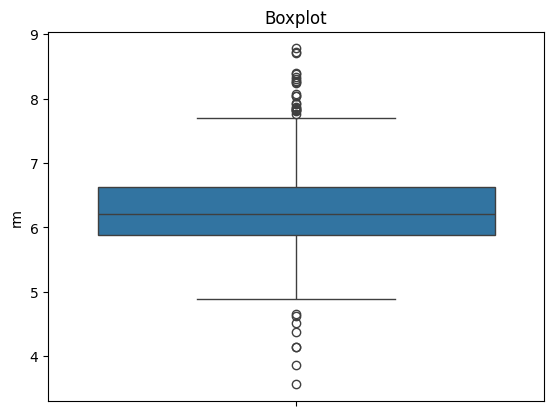

In [ ]:
#sns를 활용한 Box plot
boston = pd.read_csv("BostonHousing.csv")[['rm', 'lstat', 'crim']]

sns.boxplot(y=boston['rm'])
plt.title('Boxplot')

- tips 데이터에서, time별로 total_bill의 박스플랏
- 각 boxplot은 성별로 나눠서 표현 (hue를 지정)

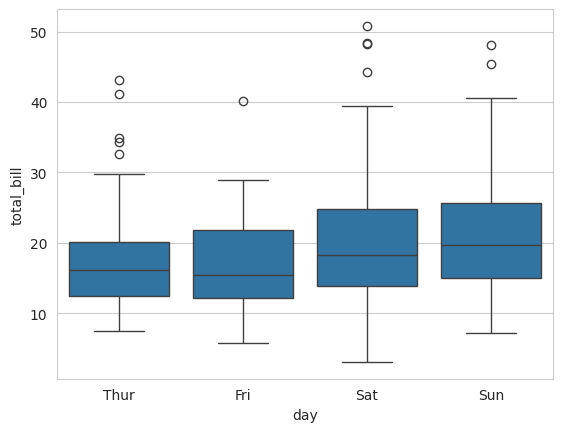

In [ ]:
#box plot
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

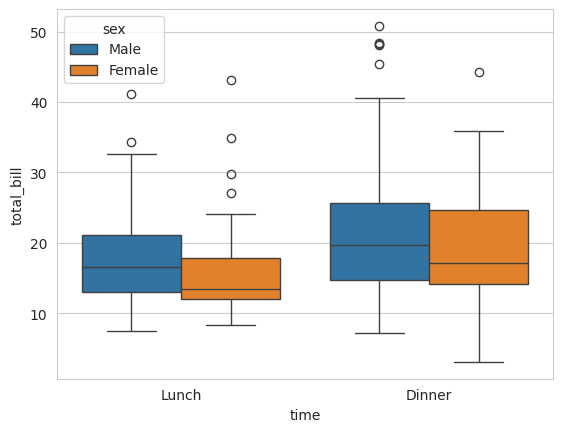

In [ ]:
#box plot
sns.boxplot(x="time", y="total_bill", hue="sex", data=tips)
plt.show()

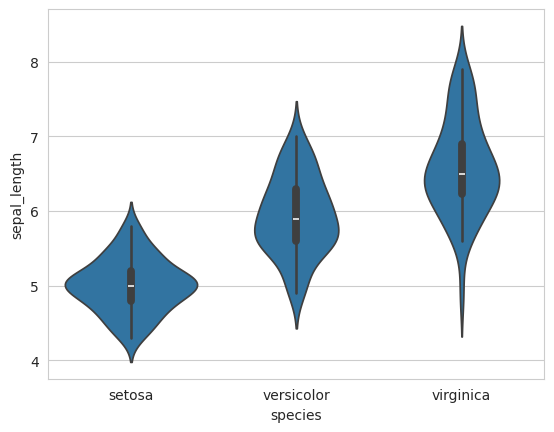

In [ ]:
#violin plot
iris = sns.load_dataset("iris")
sns.violinplot(x=iris.species, y=iris.sepal_length, data=iris);
plt.savefig("violin.png")

<Axes: >

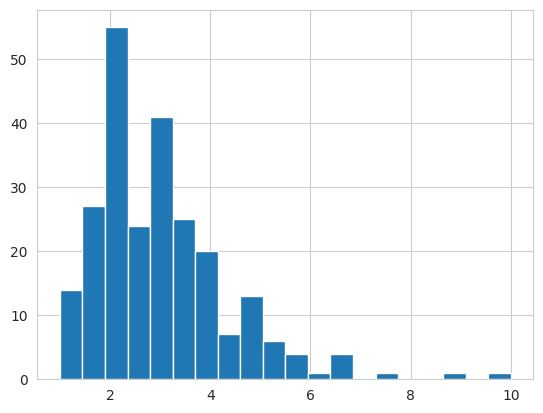

In [ ]:
#요일별 빈도 체크
tips.day.value_counts()
#tip에 대한 histogram
tips.tip.hist( bins = 20 )

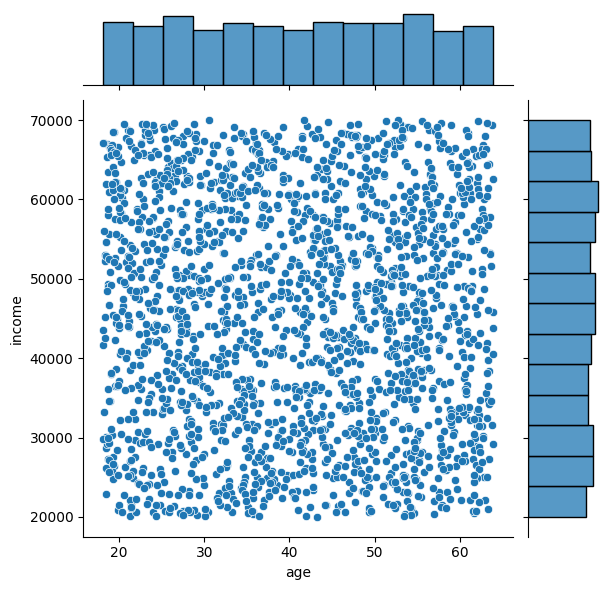

In [ ]:
data = pd.read_csv("creditset2.csv")
join1 = sns.jointplot(x="age", y="income", data=data);
join1.savefig("join1.png")

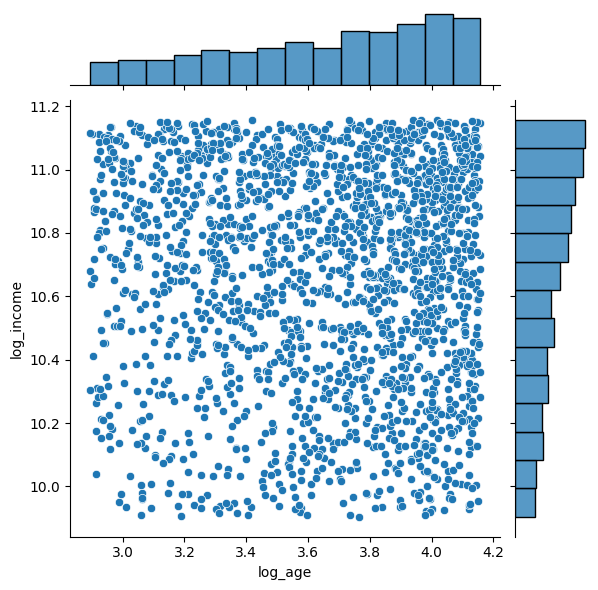

In [ ]:
data["log_age"] = np.log( data.age )
data["log_income"] =np.log( data.income)

join1 = sns.jointplot(x="log_age", y="log_income", data=data);
join1.savefig("join1_log.jpg")

In [ ]:
#pivot+Heatmap
#pivot
df1 = pd.DataFrame( {'x':['A','B', 'C', 'D', 'E', 'F'], 'y':[2021,2021,2021,2022,2022,2022], 'z':[1,2,3,4,5,6]})
df1
df1.pivot(index='x',columns='y', values='z').fillna(0) #index 중복 없어야 함.

y,2021,2022
x,,
A,1.0,0.0
B,2.0,0.0
C,3.0,0.0
D,0.0,4.0
E,0.0,5.0
F,0.0,6.0


In [ ]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
df = flights.pivot(index='month', columns='year', values='passengers') #행, 열 지정, 값 지정
df.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<Axes: xlabel='year', ylabel='month'>

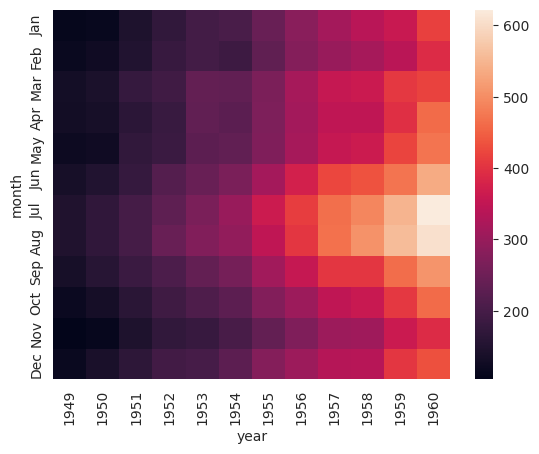

In [ ]:
sns.heatmap(df)

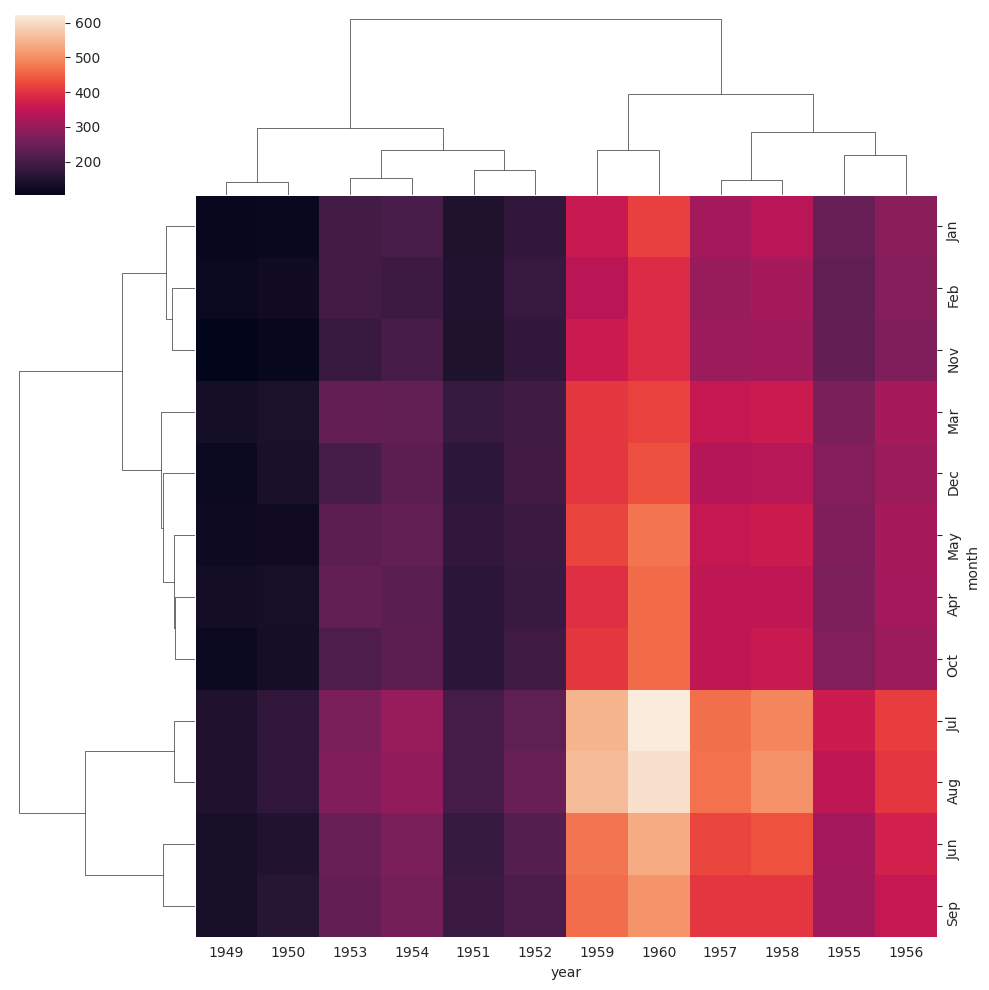

In [ ]:
sns.clustermap(df)

- pairplot

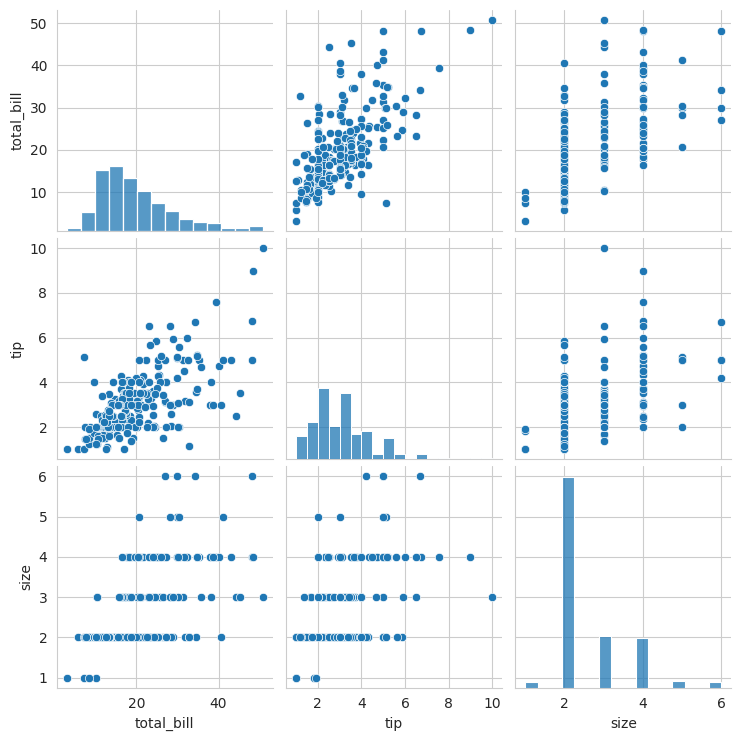

In [ ]:
sns.pairplot(tips)

#2. 선형회귀분석

- **상관관계(Correlation)**
 - A변수의 변화와 B변수의 변화방향의 (선형적)유사성으로 표준화된 공분산이라고도 함

<img src = 'https://t1.daumcdn.net/cfile/tistory/99C0B2445DF7564614'>

- **인과관계(Causality)**
 - A변수와 B변수중 하나는 원인이 되고 다른 하나는 결과가 되는 관계성


In [28]:
import pandas as pd
df = pd.read_csv("adv.csv")
df.columns
X=df.radio
Y=df.sales

In [ ]:
sns.jointplot( x="TV", y="sales", data=df)

In [ ]:
df[ ["TV", "sales"]]

In [29]:
from scipy import stats
model1 = stats.linregress( X,Y) #linear regression
model1

LinregressResult(slope=0.20249578339243954, intercept=9.311638095158287, rvalue=0.576222574571055, pvalue=4.354966001766976e-19, stderr=0.02041130636009063, intercept_stderr=0.562900496271871)

In [33]:
#diamonds.csv에서 carat에 따른 price의 변화를 직선식
X=diamonds.carat
Y=diamonds.price
model2 = stats.linregress( X,Y)
model2

LinregressResult(slope=7756.425617968437, intercept=-2256.3605800454047, rvalue=0.9215913011934769, pvalue=0.0, stderr=14.066578727561323, intercept_stderr=13.055348777678905)

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform( diamonds[ ["carat","depth", "price"]])
dia_scaled = pd.DataFrame( scaled, columns=["carat","depth", "price"])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split( dia_scaled[["carat","depth"]],
                                           dia_scaled.price, test_size=0.2) #3:1

In [71]:
from sklearn.linear_model import LinearRegression
# model1: TV->sales, sklearn
model1 = LinearRegression().fit( X_train, y_train)
#model1.score( adv[["TV"]],adv.sales )  #결정계수, 0~1, 모형이 데이터를 설명하는.
pred = model1.predict( X_test)

In [72]:
#((pred - y_test)**2).mean()  #  mean  squared error, MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

2462178.4709260357

In [92]:
import numpy as np
df = pd.read_csv("Medicalpremium.csv")
df2 = df[["Age", "Weight", "Height", "PremiumPrice"]]
df3 = pd.DataFrame( MinMaxScaler().fit_transform( df2), columns=df2.columns)
X_train, X_test, y_train, y_test = train_test_split( df3.drop("PremiumPrice", axis=1),
                                                    df3.PremiumPrice, test_size=0.3,
                                                     random_state=1)
model3 = LinearRegression().fit( X_train, y_train)
pred = model3.predict( X_test)
mean_squared_error(y_test, pred)
np.sqrt( mean_squared_error(y_test, pred) )
model3.coef_

array([ 0.60237689,  0.229212  , -0.02049806])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
df = df.iloc[:, 1:5]

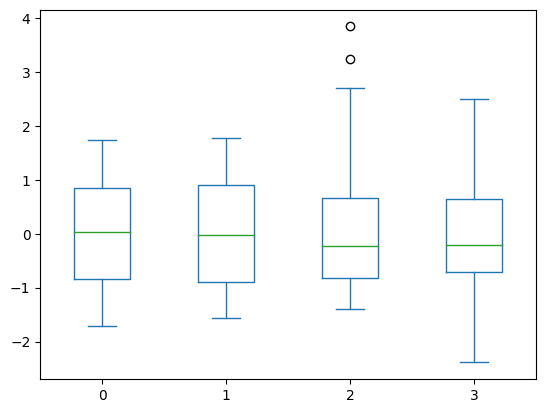

In [ ]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(df)
df3_imputed = imputer.transform(df)
df3_imputed_df = pd.DataFrame( df3_imputed )
df3_imputed_df.plot.box()
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3_imputed)
train, test = train_test_split( df3_scaled, test_size=0.3)

In [ ]:
train_df = pd.DataFrame( train, columns = df.columns)
test_df = pd.DataFrame( test, columns = df.columns)

In [ ]:
train_df.drop('sales', axis=1) #inplace=True

,TV,radio,newspaper
0,-0.908957,-0.186635,-0.564074
1,-1.498640,-0.753833,-0.329312
2,-1.214892,0.177992,-0.462804
3,-0.424367,1.170588,1.502755
4,-0.582005,-1.469583,-0.025502
...,...,...,...
135,1.602739,-0.855118,-1.111852
136,1.379711,-1.375050,0.572912
137,-1.516155,-1.294022,0.048149
138,1.568876,1.103065,1.162119


In [ ]:
from sklearn.linear_model import LinearRegression
line_fitter = LinearRegression()
line_fitter.fit(train_df.drop('sales', axis=1), train_df.sales)

LinearRegression()

In [ ]:
y_predicted = line_fitter.predict(test_df.drop('sales', axis=1))

In [ ]:
np.mean( (y_predicted-test_df.sales)**2 )

0.07457977000275537

In [ ]:
#df에 scaling을 적용: StandardScaler를 사용
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame( StandardScaler().fit_transform(df), columns=df.columns)
#scaler = StandardScaler()
#scaled = scaler.fit_transform( df )
#df = pd.DataFrame( scaled, columns=df.columns)
#df를 train, test로 파티셔닝해주세요( 8:2)
train, test = train_test_split( df, test_size=0.2)
#train으로 linear regression
model = LinearRegression().fit( train.drop(['sales', 'Unnamed: 0'], axis=1),
                               train.sales)
#X변수: TV, radio, newspaper, Y변수: sales
#model.coef_, model.intercept_
pred = model.predict( test[["TV", "radio", "newspaper"]])
import numpy as np
np.mean(   (pred - test.sales)**2  )  #Mean Squared Error
np.sqrt( np.mean(   (pred - test.sales)**2  ) ) #Rooted Mean Squared Error

# 3. 선형회귀분석 연습

In [ ]:
boston = pd.read_csv("BostonHousing.csv")

data = boston.drop("medv", axis=1)
target = boston.medv

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(data)
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, target, test_size=0.3)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

print(regr.score(X_train, Y_train))	#R^2, 결정계수
print(np.mean( np.square( regr.predict(X_test) - Y_test ) ))  #MSE
print(regr.predict(X_test[1,].reshape(1,13)))

0.764567335619148
28.90532802878914
[32.43520126]


In [ ]:
#boston 데이터셋 중에서 crim, rm, tax 변수를 X로 하여 회귀분석
# MinMaxScaling, 8:2 Partitioning, LinearRegression
# Test셋에 대한 RMSE

- 연습2

In [ ]:
import pandas as pd
from sklearn import linear_model
import numpy as np

df = pd.read_csv('unconv_MV_v5.csv')

 - Well : well index
 - Por : well average porosity (%)
 - Perm : permeability (mD)
 - AI : accoustic impedance (kg/m2s*10^6)
 - Brittle : brittleness ratio (%)
 - TOC : total organic carbon (%)
 - VR : vitrinite reflectance (%)
 - Prod : gas production per day (MCFD) - Response Variable

In [ ]:
import numpy as np

features = ['Por']
target = 'Prod'
df[features].values.reshape(-1, len(features)).shape #200,1

(200, 1)

In [ ]:
#X변수가 1개인 경우에만 아래처럼...
X = df[features].values.reshape(-1, len(features))  #2차원으로 변경 필요
y = df[target].values

In [ ]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


In [ ]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [ ]:
print( model.coef_ )
model.intercept_

[287.78074285]


-2.944431053714652

In [ ]:
model.score(X, y) #R-squared

0.7428880535051593

- porosity 15%에서의 Production

In [ ]:
x_pred = np.array([15])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([4313.76671169])

In [ ]:
x_pred = np.array([14, 18])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([4025.98596884, 5177.10894024])

In [ ]:
x_pred = X[0:5]
y_pred = model.predict(x_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


- 다중회귀

In [ ]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features].values.reshape(-1, len(features))
y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [ ]:
print(model.coef_)
model.intercept_

[244.60011793  31.58801063  86.87367291 325.19354135]


-1575.2734966267144

In [ ]:
model.score(X, y)

0.9516996043535946

 - Por = 12 (%)
 - Brittle = 81 (%)
 - VR = 2.31 (%)
 - AI = 2.8 (kg/m2s*10^6)

In [ ]:
x_pred = np.array([12, 81, 2.31, 2.8])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([5029.77688021])

In [ ]:
# 위의 자료를 이용하여 X변수는 por, brittle, toc, y변수는 prod
X=df[["Por", "Brittle", "TOC"]]
y=df.Prod
# x변수는 standard scaling
scaled = StandardScaler().fit_transform( X )
# 7:3으로 파티셔닝,
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.3)
# train으로 회귀모형
model = LinearRegression().fit( X_train, y_train )
print( model.score(X_train, y_train))
# test로 RMSE 계산
np.sqrt( np.mean( (model.predict( X_test) - y_test)**2 ) )

0.9499559119264874


285.19644407526454

- 다중공선성(Multi colinearity)
 - 다중공선성이 있으면 X변수들에 따라 계수가 변동

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('unconv_MV_v5.csv')
df = df.iloc[:, 1:-1] #x변수들만

corr = df.corr(method='spearman')

<ipython-input-61-7ac1f0664cad>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

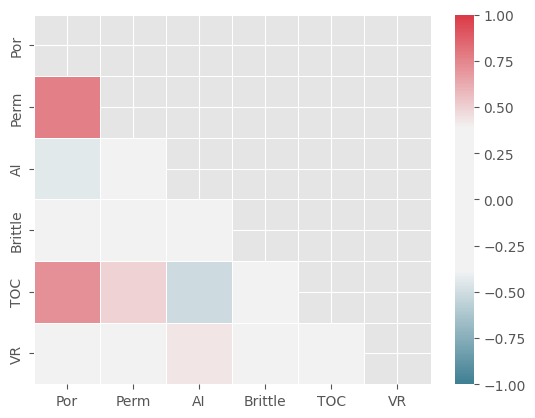

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

#4. statsmodels 사용

In [97]:
import pandas as pd
df = pd.read_csv("Medicalpremium.csv")
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [99]:
#medicalpremium.csv X: age, weight, height, Y: premiumprice, OLS
#파티셔닝: 7:3 (random_state=1), 스케일링: minmax
#test에 대한 MSE
import pandas as pd
df = pd.read_csv("Medicalpremium.csv")
df = pd.DataFrame( MinMaxScaler().fit_transform(df), columns=df.columns) #scaling
train, test = train_test_split( df, test_size=0.3, random_state=1) #partitioning
import statsmodels.api as sm
reg = sm.OLS.from_formula("PremiumPrice~Age+Height+Weight", train).fit()
print(reg.summary())
pred = reg.predict(  test )
mean_squared_error(test.PremiumPrice, pred)

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     255.2
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          3.31e-111
Time:                        06:25:15   Log-Likelihood:                -6743.7
No. Observations:                 690   AIC:                         1.350e+04
Df Residuals:                     686   BIC:                         1.351e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7739.3565   2859.825      2.706      0.0

21520246.56159869

In [ ]:
features = ['Por', 'Brittle', 'Perm', 'TOC']
target = 'Prod'

X = df[features]  #.values.reshape(-1, len(features))
y = df[target].values

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, X)    #OLS: Ordinary Least Square
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.063e+04
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                   6.70e-228
Time:                        22:35:23   Log-Likelihood:                         -1424.3
No. Observations:                 200   AIC:                                      2857.
Df Residuals:                     196   BIC:                                      2870.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#df에서 X변수들간의 correlation을 체크해보세요
#por 변수와 함께, corr이 낮은 X 변수들을 선택하세요
df.corr()
X = df[["Por", "AI", "Brittle"]]
y = df.Prod
#X 변수를 scaling
scaled = StandardScaler().fit_transform( X)

#파티셔닝(7:3)
X_train, X_test, y_train, y_test = train_test_split( scaled, y, test_size=0.3)

#sm.OLS로 회귀모형을 model 만들어보시고, 계수에 대한 p-value와 결정계수를 확인하세요
import statsmodels.api as sm
X_train = sm.add_constant( X_train)
model = sm.OLS( y_train, X_train)
print( model.fit().summary() )


                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     699.3
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           2.00e-82
Time:                        22:36:12   Log-Likelihood:                -966.93
No. Observations:                 140   AIC:                             1942.
Df Residuals:                     136   BIC:                             1954.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4309.3058     20.763    207.550      0.0

In [ ]:
X_test.shape

(60, 3)

In [ ]:
X = df[features]  #.values.reshape(-1, len(features))
y = df[target].values
X = sm.add_constant(X)
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          4.54e-127
Time:                        22:36:29   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1575.2735    119.064    -13.231      0.0

In [ ]:
import statsmodels.api as sm
reg = sm.OLS.from_formula("Prod ~ Por+Brittle+Perm+TOC", df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          4.54e-127
Time:                        22:36:40   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1575.2735    119.064    -13.231      0.0

In [ ]:
from statsmodels.formula.api import ols
model = ols(formula = "Prod ~ Por+Brittle+Perm+TOC",data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Prod   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     960.6
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          4.54e-127
Time:                        22:36:40   Log-Likelihood:                -1360.2
No. Observations:                 200   AIC:                             2730.
Df Residuals:                     195   BIC:                             2747.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1575.2735    119.064    -13.231      0.0

In [ ]:
X = df.loc[0:10, features]
model.predict(X)

0     4581.655627
1     3507.380732
2     4668.052396
3     4941.935607
4     3943.748339
5     4395.427883
6     4309.754307
7     3418.971205
8     4109.893694
9     4469.807278
10    4766.440056
dtype: float64

#5. 머신러닝 회귀

In [ ]:
# mortDefault.zip 업로드
!unzip mortDefault.zip

<ipython-input-112-6675624b8d7f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort1.drop( ["default","year"] , axis=1, inplace=True)


OLS MSE: 2354.8205164653073
DT MSE: 5104.446453829057
GB MSE: 2361.2558898913267


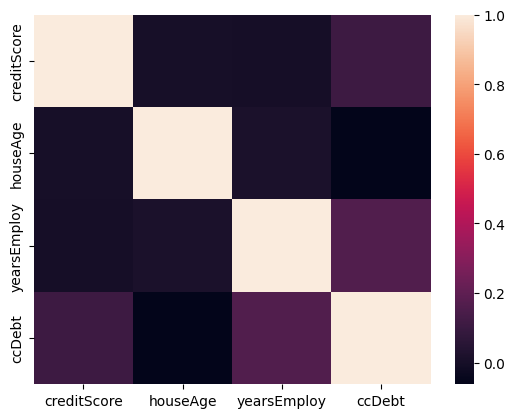

In [112]:
# 2009년 자료
# Y: creditScore, X: houseAge	yearsEmploy	ccDebt
# default: 1,0
mort = pd.read_csv("mortDefault2009.csv")
# mort.info()
mort.default.value_counts()
mort1 = mort[ mort.default==1]
mort1.shape
mort1.drop( ["default","year"] , axis=1, inplace=True)
cor = mort1.corr()
sns.heatmap(cor)

X_train, X_test, y_train, y_test = train_test_split( mort1.drop("creditScore", axis=1),
                                                    mort1.creditScore,
                                                     random_state=1, test_size=0.2)
ols = LinearRegression().fit( X_train, y_train)
pred = ols.predict( X_test)
print( "OLS MSE:",  mean_squared_error(y_test, pred) )

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit( X_train, y_train)
pred = dt.predict( X_test)
print( "DT MSE:",  mean_squared_error(y_test, pred) )

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor().fit( X_train, y_train)
pred = gb.predict( X_test)
print( "GB MSE:",  mean_squared_error(y_test, pred) )


In [116]:
credit = pd.read_csv("creditset2.csv")
credit.default10yr.value_counts()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit( credit.drop("default10yr", axis=1), credit.default10yr)
dt.predict( credit.drop("default10yr", axis=1) )

array([0, 0, 0, ..., 1, 0, 0])

In [118]:
#mort2007 -> mort
#creditScore Y, 나머지를 X (year, default 제외)
#OLS
#파티셔닝, 스케일링, MSE
mort = pd.read_csv("mortDefault2007.csv")
mort.drop( ["year", "default"], axis=1, inplace=True)
scaler = MinMaxScaler()
scaled = scaler.fit_transform( mort)
mort_scaled = pd.DataFrame( scaled, columns=mort.columns)

X_train, X_test, y_train, y_test = train_test_split( mort_scaled.drop("creditScore",
                                                                      axis=1),
                                                    mort_scaled.creditScore,
                                                     random_state=1, test_size=0.2)
ols = LinearRegression().fit( X_train, y_train)
pred = ols.predict( X_test)
print( "OLS MSE:",  mean_squared_error(y_test, pred) )

OLS MSE: 0.011448589230439888


In [125]:
pred
scaler

array([457.,   0.,   0.,   0.])

In [119]:
#Y: default
#x: year, default, creditscore 제외,
mort = pd.read_csv("mortDefault2007.csv")
X_train, X_test, y_train, y_test = train_test_split( mort.drop(["creditScore","year","default"],
                                                                      axis=1),
                                                    mort.default,
                                                     random_state=1, test_size=0.2)

dt = DecisionTreeClassifier().fit(X_train, y_train)
dt.predict( X_test )


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('unconv_MV_v5.csv')
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

#전처리
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

#학습

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

np.mean( (y_test - dt.predict(X_test))**2)


167190.67453973627

In [ ]:
!pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10667 sha256=ac1947fafa8853d10989445c70a4b38ed73f975420dea2312837e073ebf1aaa8
  Stored in directory: /root/.cache/pip/wheels/d9/f2/53/6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


51849.71909941013


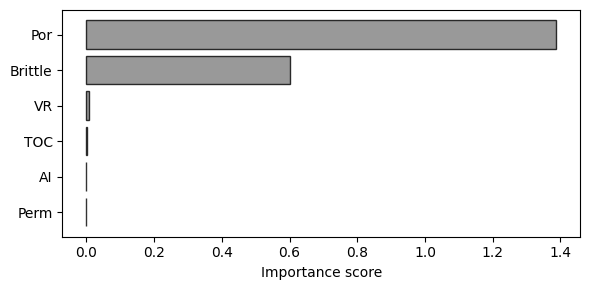

In [ ]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('unconv_MV_v5.csv')
features = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

#전처리
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Prod',axis=1), df_train['Prod']
X_test, y_test = df_test.drop('Prod',axis=1), df_test['Prod']

#학습

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

print( np.mean( (y_test - rf.predict(X_test))**2) )

#변수 중요도 및 시각화
imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(6, 3))
ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
plt.gca().invert_yaxis()
fig.tight_layout()

In [ ]:
#pykrx설치하셔서-> 어제 날짜 시장내 주가정보, 시장 내 지표들
!pip install pykrx

from pykrx import stock

df1 = stock.get_market_ohlcv( "20240722")
df2 = stock.get_market_fundamental( "20240722")

#join으로 합치기
df3 = df1.join(df2)

In [ ]:
df3.head()

In [131]:
#종가에 영향을 미치는 다른 변수들로 회귀분석
#Y: 종가
#X: 거래량, PER
df3.dropna(inplace=True)
#파티셔닝 8:2
X_train, X_test, y_train, y_test = train_test_split( df3[["거래량","PER"]],
                                                    df3.종가, test_size=0.2  )
#OLS, ML회귀 MSE 비교하세요
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
ols = LinearRegression().fit( X_train, y_train)
print( mean_squared_error( y_test, ols.predict(X_test)))
dt = DecisionTreeRegressor().fit(X_train, y_train)
print( mean_squared_error( y_test, dt.predict(X_test)) )
gb = GradientBoostingRegressor().fit(X_train, y_train)
print( mean_squared_error( y_test, gb.predict(X_test)) )
ols.coef_

3675145572.6364145
13691289723.28623
6628209721.464044


array([-1.32018991e-03,  1.50190591e+00])

In [137]:
X_test

거래량    1.121896e+06
PER    2.026422e+01
dtype: float64